In [ ]:
import pandas as pd
import numpy  as np
import  re

In [ ]:
df=pd.read_csv('df_removed_duplicate5.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'text', 'tags'],
      dtype='object')

In [ ]:
df.shape

(10958, 7)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train = vectorizer.fit_transform(df['tags']).toarray()

In [ ]:
y_train.shape

(10958, 81)

In [ ]:
genre_new=[] #declare a list
for cell in df['tags']:
    cell=cell.replace(" ", "") #remove whitespace
    cell=cell.replace("&", "& ") #add whitespace back in for ampersands
    genre_new.append(cell.split(",")) #for each genre cell, create a list of items from the original string, using a comma as a delimeter
    

df['tags_new'] = genre_new 



#initialize MultiLabelBinarizer 
mlb = MultiLabelBinarizer() 

#transform the genre_new column to a series of columns with binary values
binary_labels=pd.DataFrame(mlb.fit_transform(df['tags_new']),columns=mlb.classes_) 

#order columns alphabetically
binary_labels=binary_labels.sort_index(axis=1) 

binary_labels.tail()

,,api,c,css,designpattern,devops,golang,html,ios,nodejs,oop,php,reactnative,redux,ubuntu,vscode,آموزشبرنامهنویسی,آموزشپایتون,استارتاپ,استخدام,الگوریتم,امنیت,اندروید,اندرویداستودیو,اپلیکیشن,اینترنت,اینستاگرام,برنامهنویسی,برنامهنویسیاندروید,برنامهنویسیوب,تجربهکاربری,تحلیلداده,تلگرام,توسعهدهنده,توسعهوب,تکنولوژی,جاوا,جاوااسکریپت,جنگو,دادهکاوی,داکر,دیجیتالمارکتینگ,رابطکاربری,ریاکت,زبانبرنامهنویسی,سئو,سیشارپ,شیگرایی,طراحیسایت,طراحیوب,علمداده,فرانتاند,فلاتر,فناوری,لاراول,لینوکس,مصاحبه,مهارت,مهندسینرمافزار,موفقیت,نرمافزار,هوشمصنوعی,هک,وب,وردپرس,ویرگول,ویندوز,پایتون,کاتلین,کامپیوتر,کتاب,کد,کدنویسی,کسبوکار,گوگل,گیت,گیتهاب,یادگیری,یادگیریعمیق,یادگیریماشین
10953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
binary_labels.shape

(10958, 80)

In [ ]:
df = df[{"text","tags"}]

In [ ]:
df.shape

(10958, 2)

In [ ]:
df['words'] = df['text'].apply(lambda x: str(x).split(' '))
df['words_count'] = df['text'].apply(lambda x: len(str(x).split(' ')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['sentence_count'] = df['text'].apply(lambda x: len(str(x).split('.')))
df['sentences'] = df['text'].apply(lambda x: str(x).split('.'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head(10)

,text,tags,words,words_count,sentence_count,sentences
0,گروهی از محققان فیسبوک در همکاری با پزشکان Lan...,هوش مصنوعی,"[گروهی, از, محققان, فیسبوک, در, همکاری, با, پز...",1417,55,[گروهی از محققان فیسبوک در همکاری با پزشکان La...
1,دانشمندان دانشگاه واویک با استفاده از هوش مصنو...,هوش مصنوعی,"[دانشمندان, دانشگاه, واویک, با, استفاده, از, ه...",949,34,[دانشمندان دانشگاه واویک با استفاده از هوش مصن...
2,بررسی‌های انجام شده نشان می‌دهند که در حدود %۵...,"گوگل,هوش مصنوعی","[بررسی‌های, انجام, شده, نشان, می‌دهند, که, در,...",550,20,[بررسی‌های انجام شده نشان می‌دهند که در حدود %...
3,خبرگزاری گاردین امروز مقاله‌ای منتشر کرد که گف...,هوش مصنوعی,"[خبرگزاری, گاردین, امروز, مقاله‌ای, منتشر, کرد...",1478,100,[خبرگزاری گاردین امروز مقاله‌ای منتشر کرد که گ...
4,برای نخستین بار و با استفاده از خوشه‌ی ابررایا...,هوش مصنوعی,"[برای, نخستین, بار, و, با, استفاده, از, خوشه‌ی...",916,39,[برای نخستین بار و با استفاده از خوشه‌ی ابررای...
5,روز گذشته انویدیا از یک پلتفرم مختص تماس‌های ت...,هوش مصنوعی,"[روز, گذشته, انویدیا, از, یک, پلتفرم, مختص, تم...",488,16,[روز گذشته انویدیا از یک پلتفرم مختص تماس‌های ...
6,پیشرفت‌های صورت گرفته در زمینه‌ی هوش مصنوعی با...,هوش مصنوعی,"[پیشرفت‌های, صورت, گرفته, در, زمینه‌ی, هوش, مص...",550,16,[پیشرفت‌های صورت گرفته در زمینه‌ی هوش مصنوعی ب...
7,به گفته‌ی پلیس کشور بریتانیا،‌ یک سیستم بسیار ...,هوش مصنوعی,"[به, گفته‌ی, پلیس, کشور, بریتانیا،‌, یک, سیستم...",1582,69,[به گفته‌ی پلیس کشور بریتانیا،‌ یک سیستم بسیار...
8,تقریبا همه ما می‌دانیم دیدگاه ایلان ماسک دربار...,هوش مصنوعی,"[تقریبا, همه, ما, می‌دانیم, دیدگاه, ایلان, ماس...",399,14,[تقریبا همه ما می‌دانیم دیدگاه ایلان ماسک دربا...
9,در روزهای گذشته، یکی از پروژه‌های اسرارآمیز سا...,هوش مصنوعی,"[در, روزهای, گذشته،, یکی, از, پروژه‌های, اسرار...",406,13,[در روزهای گذشته، یکی از پروژه‌های اسرارآمیز س...


In [ ]:
# df_aug = pd.DataFrame(columns=[ 'text', 'tags' , 'words' 	 , 'sentences'])

In [ ]:
df_aug['name']=np.zeros(190000)

In [ ]:
df_aug['text']=np.zeros(190000)
df_aug['tags']=np.zeros(190000)
df_aug['words']=np.zeros(190000)
df_aug['sentence_count']=np.zeros(190000)

In [ ]:
df_aug.shape

(190000, 6)

In [ ]:
# def counts(data, column):
#     count_list = []
#     datr = data[column]
    
#     # per rows
#     for i in range(len(datr)):
#         #first per row get the words
#         text=datr[i]
#         total_words = " ".join(datr).split(' ')

#         count_word = len(total_words)
#         seg_count=count_word//100
#         if seg_count>2:
            
        
#         #cycle per word
#         # total_row = []
#         # for word in word_list:
#         #     count = []
#         #     count = total_words.count(word)
#         #     val = (word, count)
#         #     total_row.append(val)
#         # full_list.append(total_row)
#     return count_list

(0.0, 40.0)

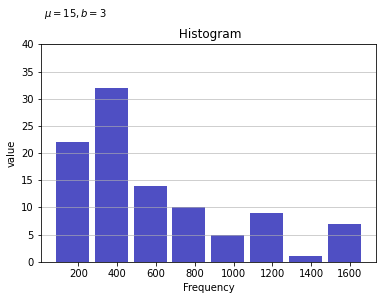

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(df['words_count'][:100], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Frequency')
plt.ylabel('value')
plt.title(' Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


In [ ]:
np.min(df['words_count'])

1

In [ ]:
df[df['words_count']==1]

,text,tags,words,words_count,sentence_count,sentences
10923,,ویندوز,[ ],1,1,[ ]


In [ ]:
counter=0

for j in range(df.shape[0]):
    total_sentences = ".".join(df['sentences'][j]).split('.')
    count_sentences = len(total_sentences)
    # print(j , count_word)
    seg_count=count_sentences//4
    rest = count_sentences%4
    if seg_count>1:
        for i in range(0,seg_count-1):
            counter=counter+1
            k=counter
            text_first  = total_sentences[:2]
            text_last   = total_sentences[-(2+rest):]
            if i==0:

                 text        = text_first+text_last
                 text        = " ".join(text).split(',')
                 df_aug.loc[:,('tags')][k]=df['tags'][j]
                 df_aug.loc[:,('text')][k]=text

            else:
                text_middle = total_sentences[2*i:2*(i+1)]
                text        = text_first+text_middle+text_last
                text        = " ".join(text).split(',')

                df_aug.loc[:,('text')][k]=text
                df_aug.loc[:,('tags')][k]=df['tags'][j]



        



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_aug['words_count'] = df_aug['text'].apply(lambda x: len(str(x).split(' ')))

In [ ]:
df_aug[-20:]

,text,tags,words,sentences,name,sentence_count,words_count
189980,0.0,0.0,0.0,NaN,0.0,0.0,1
189981,0.0,0.0,0.0,NaN,0.0,0.0,1
189982,0.0,0.0,0.0,NaN,0.0,0.0,1
189983,0.0,0.0,0.0,NaN,0.0,0.0,1
189984,0.0,0.0,0.0,NaN,0.0,0.0,1
189985,0.0,0.0,0.0,NaN,0.0,0.0,1
189986,0.0,0.0,0.0,NaN,0.0,0.0,1
189987,0.0,0.0,0.0,NaN,0.0,0.0,1
189988,0.0,0.0,0.0,NaN,0.0,0.0,1
189989,0.0,0.0,0.0,NaN,0.0,0.0,1


In [ ]:
df_aug=df_aug.drop(['sentences' , 'words_count'], axis=1)

In [ ]:
df_aug.columns

Index(['text', 'tags', 'words', 'name', 'sentence_count'], dtype='object')

In [ ]:
df_aug=df_aug.drop(['words', 'name', 'sentence_count'], axis=1)

In [ ]:
df_aug.shape

(190000, 2)

In [ ]:
total_words = ".".join(df['sentences'][0]).split('.')
len(total_words)

55

In [ ]:
df_final=df_aug.loc[~(df_aug==0).all(axis=1)]

In [ ]:
df_final.shape

(91202, 2)

In [ ]:
df_final=df_final.dropna()

In [ ]:
df=df_final

In [ ]:
df.shape

(91202, 2)

In [ ]:
df_final.to_csv('df_augmented_without_preprocessing.csv')

In [ ]:
tags=list(set(df['tags'].values))
len(tags)

1244

In [ ]:
df_final.to_csv('df_augmented_sentence_80tags.csv')

In [ ]:
total_words = " ".join(text).split(',')
total_words

['دایرکت ادمین یکی از قوی ترین و بهترین کنترل پنلهای تحت وب گرافیکی موجود برای سرورهای لینوکس می باشد و مدیریت وب سایت ها بر روی هاست و سرور را بسیار آسان کرده است با دایرکت ادمین می توان وب سایت ها را با سطوح Admin، Reseller یا نماینده و کاربر معمولی مدیریت کرد • مدیریت اکانت \n• بسته های توسعه از پیش تعریف شده سفارشی  همچنین این سایت پشتیبانی آموزش کاملا جزئی و دقیق و مستندات کاملی برای مدیران و نمایندگان در فراهم اورده است دایرکت ادمین یک کنترل پنل هاست است  یک امکان ثابت از ارائه دهندگان خدمات میزبانی سایت است نه یک گزینه برای کاربر نهایی  به عنوان یک کاربر اگر شما دوست دارید با دایرکت ادمین کار کنید ( به جای مثلا Cpanel یا کنترل پنل های دیکر ) باید به دنبال شرکتی بگردید که روی سرور خود این کنترل پنل را نصب و استفاده می کند ']

In [ ]:
len(text)

122

In [ ]:
# dfff = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
# dfff.shape

In [ ]:
# df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

# df_1 = dfff.append(df2 , ignore_index=True)

In [ ]:
# df_1.shape

In [ ]:
# total_words[-2:]